In [7]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor, ExtraTreesRegressor


In [8]:
df_ml = pd.read_csv('clean_data_w_neigh.csv',index_col="id")

In [9]:
#df_ml = df_ml.drop(columns=["Unnamed: 0","Unnamed: 0.1","id",])
df_ml.head(1)

,sq_mt_built,n_rooms,n_bathrooms,floor,buy_price,buy_price_by_area,is_renewal_needed,is_new_development,has_lift,is_exterior,has_parking,lat,long,security,transport,health,education
id,,,,,,,,,,,,,,,,,
21742,64,2,1,3,85000,1328,0,0,0,1,0,40.342876,-3.688974,0,20,6,3


In [4]:
corr_matrix = df_ml.corr()
plt.figure(figsize=(12,7))
sns.heatmap(corr_matrix, annot = True, linewidth = 0.5)

NameError: name 'plt' is not defined

### Select and train a model

Note : Logistic Regression and Tree based algorithms such as Decision Tree, Random forest and gradient boosting, are not sensitive to the magnitude of variables. So standardization is not needed before fitting this kind of models.

In [10]:
X = df_ml.drop("buy_price", axis=1) 
y = df_ml["buy_price"].copy()

Se estandariza y se divide el dataframe en entrenamiento y test.

In [7]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

min_max_scaler = preprocessing.MinMaxScaler()
X_scaled =min_max_scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)

In [8]:
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score


In [9]:
models = {
    "forest" : RandomForestRegressor(),
    "bagging": BaggingRegressor(),
    "ada": AdaBoostRegressor(),
    "extraTree": ExtraTreesRegressor(),
    "histGrad": HistGradientBoostingRegressor(),
    "linear_reg": LinearRegression(),
    "ridge": Ridge(),
    "lasso": Lasso(),
    "ridgeCV": RidgeCV(),
    "elasticnet": ElasticNet(),    
    "tree" : DecisionTreeRegressor(),
    "neighbors_reg": KNeighborsRegressor(),  
    "gradient": GradientBoostingRegressor()
}

In [10]:
for name, model in models.items():
    print(f"-------{name}-------")
    print(f"Entrenando {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print ("RMSE", round(np.sqrt(mean_squared_error(y_test,y_pred)),2))
    scores = cross_val_score(model,X,y, cv=10, n_jobs=-1)
    print(f"{name} accuracy {np.mean(scores)}")
print("Finalizado")

-------forest-------
Entrenando forest
RMSE 38782.56
forest accuracy 0.9933522624777374
-------bagging-------
Entrenando bagging
RMSE 38794.12
bagging accuracy 0.9916127921825332
-------ada-------
Entrenando ada
RMSE 220016.4
ada accuracy -0.5305905068140893
-------extraTree-------
Entrenando extraTree
RMSE 32490.03
extraTree accuracy 0.9941468440510824
-------histGrad-------
Entrenando histGrad
RMSE 50986.19
histGrad accuracy 0.9886719268171268
-------linear_reg-------
Entrenando linear_reg
RMSE 152913.57
linear_reg accuracy 0.6982625862453029
-------ridge-------
Entrenando ridge
RMSE 153386.58
ridge accuracy 0.6982962716684901
-------lasso-------
Entrenando lasso
RMSE 152914.44
lasso accuracy 0.6982757091185552
-------ridgeCV-------
Entrenando ridgeCV
RMSE 152945.57
ridgeCV accuracy 0.6985967364157506
-------elasticnet-------
Entrenando elasticnet
RMSE 463427.77
elasticnet accuracy 0.7110357235131841
-------tree-------
Entrenando tree
RMSE 51542.23
tree accuracy 0.9854574197072903
--

Nos quedamos con los modelos más precisos:bagging, gradient, extra tree y random forest

##### Bagging

In [84]:
model = BaggingRegressor().fit(X_train, y_train)
y_pred_bagging = model.predict(X_test)
print ("RMSE", round(np.sqrt(mean_squared_error(y_test,y_pred_bagging)),2))
scores = cross_val_score(model,X,y, cv=10, n_jobs=-1)
print(f"accuracy {np.mean(scores)}")
print("Finalizado")

RMSE 36480.66
accuracy 0.9886425527696417
Finalizado


Text(0.5, 1.0, 'RandomForestRegressor')

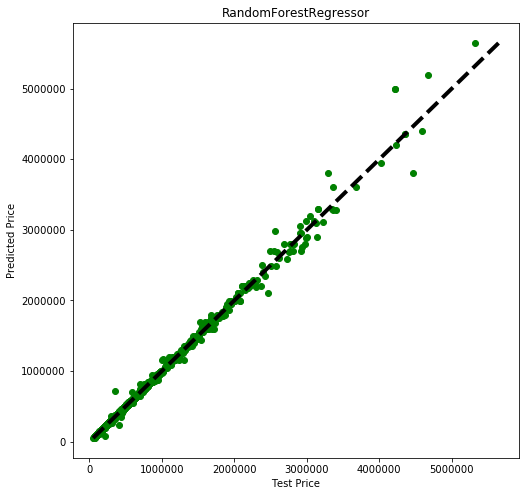

In [99]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(y_pred_bagging, y_test, color="g")
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Test Price')
ax.set_ylabel('Predicted Price')
ax.set_title("Bagging")

#### Gradient Boosting

In [86]:
model = GradientBoostingRegressor().fit(X_train, y_train)
y_pred_boost = model.predict(X_test)
print ("RMSE", round(np.sqrt(mean_squared_error(y_test,y_pred_boost)),2))
scores = cross_val_score(model,X,y, cv=10, n_jobs=-1)
print(f"accuracy {np.mean(scores)}")
print("Finalizado")

RMSE 32256.6
accuracy 0.9872915756632372
Finalizado


Text(0.5, 1.0, 'RandomForestRegressor')

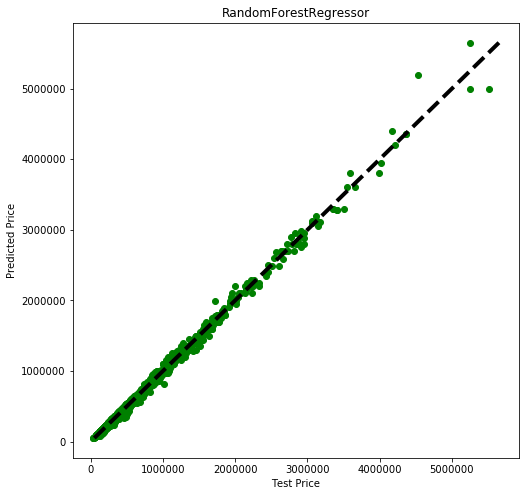

In [96]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(y_pred_boost, y_test, color="g")
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Test Price')
ax.set_ylabel('Predicted Price')
ax.set_title("Gradient Boosting")

##### Ramdom Forest

In [93]:
model = RandomForestRegressor().fit(X_train, y_train)
y_pred_rdmf = model.predict(X_test)
print ("RMSE", round(np.sqrt(mean_squared_error(y_test,y_pred_rdmf)),2))
scores = cross_val_score(model,X,y, cv=10, n_jobs=-1)
print(f"accuracy {np.mean(scores)}")
print("Finalizado")

RMSE 37753.7
accuracy 0.9908210405034463
Finalizado


Text(0.5, 1.0, 'RandomForestRegressor')

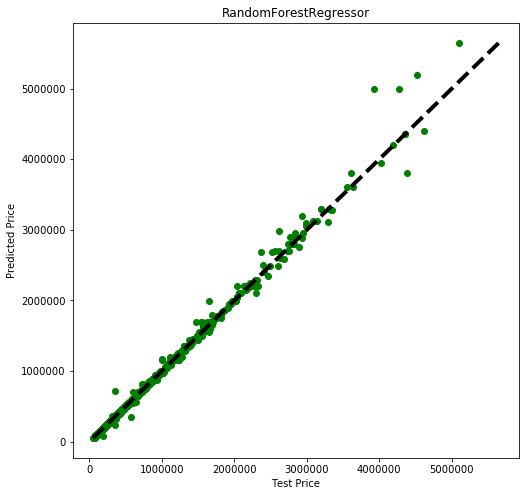

In [94]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(y_pred_rdmf, y_test, color="g")
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Test Price')
ax.set_ylabel('Predicted Price')
ax.set_title("RandomForestRegressor")

##### Extra Trees Regressor

In [56]:
model = ExtraTreesRegressor().fit(X_train, y_train)
y_pred_extra = model.predict(X_test)
print ("RMSE", round(np.sqrt(mean_squared_error(y_test,y_pred_extra)),2))
scores = cross_val_score(model,X,y, cv=10, n_jobs=-1)
print(f"accuracy {np.mean(scores)}")
print("Finalizado")

RMSE 32791.06
accuracy 0.9939093882402037
Finalizado


Text(0.5, 1.0, 'ExtraTreesRegressor')

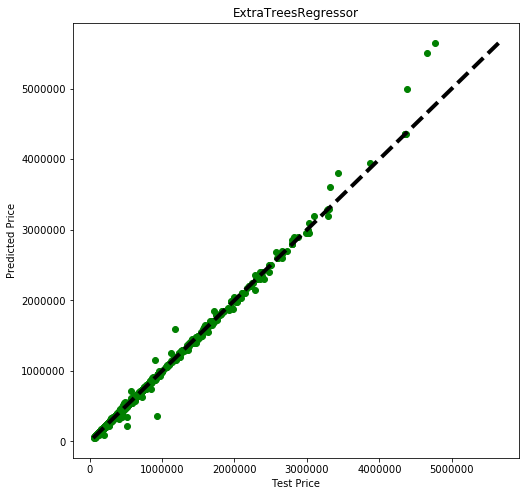

In [57]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(y_pred_extra, y_test, color="g")
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Test Price')
ax.set_ylabel('Predicted Price')
ax.set_title("ExtraTreesRegressor")

## ajuste

In [6]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth': [10, 20, 40, 60, 80, 100],
              'max_features': [0, 5, 10],
              'min_samples_leaf': [10, 20, 30],
              'min_samples_split': [10, 15, 20]
              }

rfc = ExtraTreesRegressor()
grid = GridSearchCV(rfc, parameters, verbose=1, n_jobs=-1, cv=5)
grid.fit(X_train,y_train)

NameError: name 'ExtraTreesRegressor' is not defined

In [15]:
print(grid.best_params_)

{'max_depth': 80, 'max_features': 10, 'min_samples_leaf': 10, 'min_samples_split': 20}


### Modelo elegido : ExtraTreesRegressor

In [11]:
final_model = ExtraTreesRegressor(max_depth=80,max_features=10,min_samples_leaf=10,min_samples_split=20).fit(X, y)

Salvamos el modelo para poder usarlo posteriormente

In [12]:
import pickle
filename = '111ExtraTrees_model.sav'
pickle.dump(final_model, open(filename, 'wb'))

In [6]:
import pickle
print(pickle.format_version)

4.0


In [119]:
df_ml.head(1)

,sq_mt_built,n_rooms,n_bathrooms,floor,buy_price,buy_price_by_area,is_renewal_needed,is_new_development,has_lift,is_exterior,has_parking,lat,long,security,transport,health,education
id,,,,,,,,,,,,,,,,,
21742,64,2,1,3,85000,1328,0,0,0,1,0,40.342876,-3.688974,0,20,6,3


In [125]:
#https://www.idealista.com/inmueble/90918731/ - 330.000€
#https://www.idealista.com/inmueble/88491902/ - 399.000€
#https://www.idealista.com/inmueble/91329158/ - 170.000€

input1 = np.array([[101, 2, 2, 1, 3292, 0,0,1,1,0, 40.404778, -3.693936,0,87,16,1],
                  [110, 3, 2, 2, 3292, 0,0,1,1,0, 40.404778, -3.693936,0,87,16,1],
                  [40, 2, 1, 1, 3292, 0,0,0,1,0, 40.402373, -3.7139,0,87,16,1]])

In [113]:
#min_max_scaler = preprocessing.MinMaxScaler()
#input1_scaled =min_max_scaler.fit_transform(input1)

In [114]:
estimacion = final_model.predict(input1)

In [115]:
estimacion

array([329853.17040978, 369872.08381705, 150034.39533565])

Quitando las columnas security transport health y education para calcular el impacto en la predicción

In [121]:
prueba = X.drop(columns=["security","transport","health","education"])

In [131]:
dffinal_model = ExtraTreesRegressor(max_depth=80,max_features=10,min_samples_leaf=10,min_samples_split=20).fit(prueba, y)

In [132]:
inputs = np.array([[101, 2, 2, 1, 3292, 0,0,1,1,0, 40.404778, -3.693936],
                  [110, 3, 2, 2, 3292, 0,0,1,1,0, 40.404778, -3.693936],
                  [40, 2, 1, 1, 3292, 0,0,0,1,0, 40.402373, -3.7139]])


dffinal_model.predict(inputs)

array([331738.66511056, 360522.11511032, 146647.34005266])